In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_excel('DATA/Titanic_Survival_Train.xls',
                       index_col=0, header=0)       

test_df = pd.read_excel('DATA/Titanic_Survival_Test.xls',
                       index_col = 0, 
                       header = 0)

print(train_df.shape)
print(test_df.shape)

(891, 11)
(21, 11)


In [5]:
# 1. Function to create piechart


def create_piechart(data,column):
    """
    objective: Create Piechart for Categorical variables present in Pandas DataFrame
    
    Parameters: 
          Data: This is pandas dataframe
          Column: This is column name which is used to create plot
          
    Return:
        This will show piechart
    
    """
    
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
    
    plt.pie(sizes,
           labels=labels,
           autopct='%1.2f%%',
           shadow=False,
           startangle=45)
    
    plt.axis('equal')
    plt.title("Piechart for {}".format(column))
    plt.show()
    
#2. Function to find missing data

def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame
    
    return: Missing value data frame
    
    """
    
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: EDA

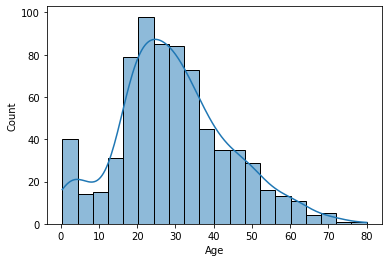

In [7]:
# Plot histogram
sns.histplot(data = train_df, x="Age", kde = True)
plt.show()

- Majority passenger belongs to age group of 20 to 40
- children from 1 to 5 age is 40
- less senior citizen

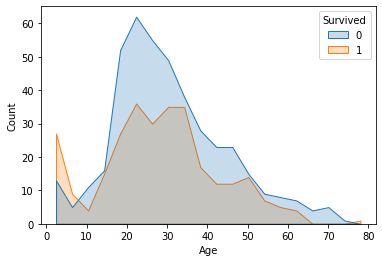

In [8]:
sns.histplot(data = train_df, x="Age", 
             kde = False, 
             hue = "Survived",
             element="poly")
plt.show()

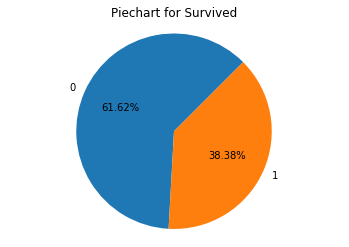

In [9]:
create_piechart(train_df, "Survived")

- From the above plot we can observe that only 38.38% of people survived

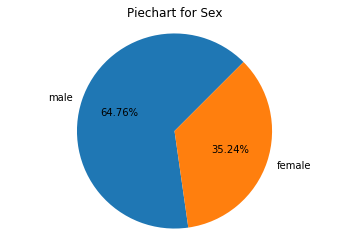

In [10]:
create_piechart(train_df, "Sex")

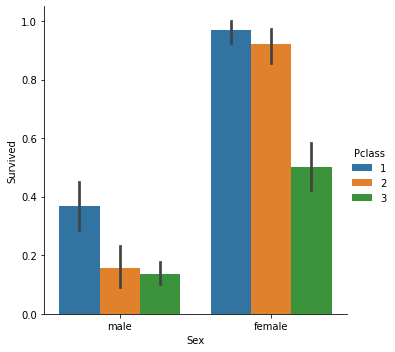

In [12]:
sns.catplot(data=train_df,
           x="Sex",
           y="Survived",
           hue="Pclass",
           kind="bar")

plt.show()

- From the above plot we may observe that if the passenger is female and she belongs to class P1 category then her chances of survival during the accident will be 95% - 100 as compared to P1 class of Male passenger which is about 25% - 37%.
- And if a female passenger belongs to P2 category then her chances of survival will be 85% to 95% as compared to male passenger of p2 category which is oly 5% - 15%.
- and if she belongs to P3 class category then her chances of survival is is a little low but more than the chances of a male passenger of P1 category which is 40% to 50%

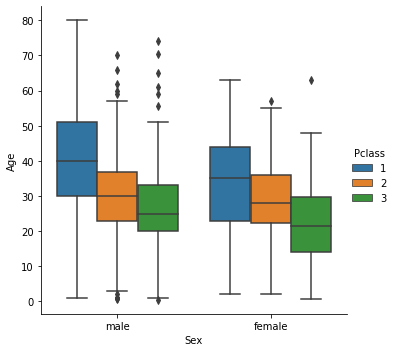

In [15]:
sns.catplot(data=train_df,
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="box")

plt.show()

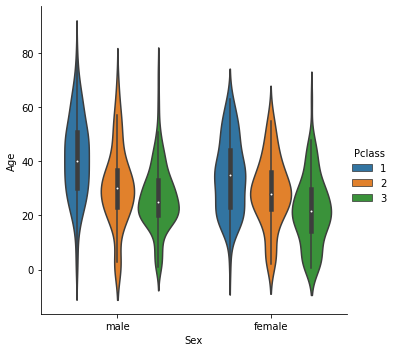

In [16]:
sns.catplot(data=train_df,
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="violin")

plt.show()

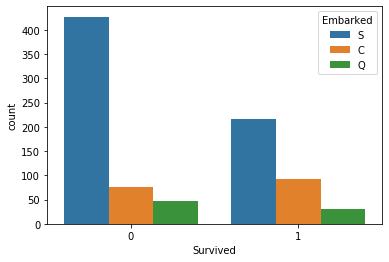

In [17]:
sns.countplot(x="Survived",
             hue="Embarked",
             data=train_df)
plt.show()

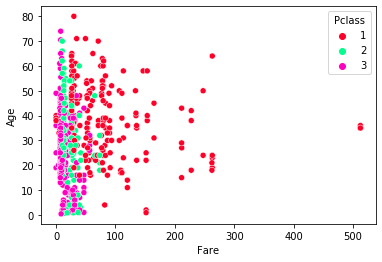

In [18]:
sns.scatterplot(data=train_df, x="Fare",y="Age",hue="Pclass",palette='gist_rainbow')
plt.show()

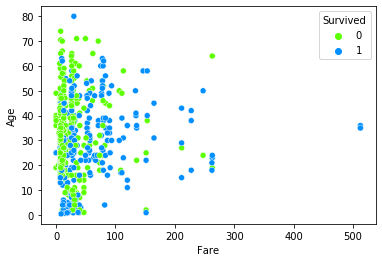

In [19]:
sns.scatterplot(data=train_df, x="Fare",y="Age",hue="Survived",palette='gist_rainbow')
plt.show()

### Step 3: Data Preprocessing

In [20]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
#Feature selection
train_df = train_df[['Name','Pclass','Sex','Age','Survived']]
test_df = test_df[['Name','Pclass','Sex','Age','Survived']]

In [22]:
# Find the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [23]:
# imputing numerical missing data with mean value

train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

In [24]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [25]:
# manual labelling
train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})

In [26]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,0,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
3,"Heikkinen, Miss. Laina",3,1,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
5,"Allen, Mr. William Henry",3,0,35.0,0


In [27]:
test_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
871,"Balkic, Mr. Cerin",3,0,26.0,0
872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,1,47.0,1
873,"Carlsson, Mr. Frans Olof",1,0,33.0,0
874,"Vander Cruyssen, Mr. Victor",3,0,47.0,0
875,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,1,28.0,1


In [28]:
test_df.shape

(21, 5)

In [29]:
X_train = train_df.values[:870, 1:-1]   #variables from pclass to age
y_train = train_df.values[:870,  -1]    # passengersids from 1 to 870
y_train = y_train.astype(int)

X_test = test_df.values[:, 1:-1]
y_test = test_df.values[:,  -1]
y_test = y_test.astype(int)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# mean = 0 and std = 1

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [31]:
X_train_scale

array([[1.        , 0.        , 0.27117366],
       [0.        , 1.        , 0.4722292 ],
       [1.        , 1.        , 0.32143755],
       ...,
       [0.        , 0.        , 0.3842674 ],
       [1.        , 0.        , 0.36792055],
       [1.        , 0.        , 0.04498618]])

In [32]:
X_test_scale

array([[1.        , 0.        , 0.32143755],
       [0.        , 1.        , 0.58532295],
       [0.        , 0.        , 0.40939935],
       [1.        , 0.        , 0.58532295],
       [0.5       , 1.        , 0.34656949],
       [1.        , 1.        , 0.18321186],
       [1.        , 0.        , 0.24604172],
       [1.        , 0.        , 0.23347575],
       [1.        , 0.        , 0.36971733],
       [0.        , 1.        , 0.69841669],
       [0.5       , 1.        , 0.30887158],
       [1.        , 0.        , 0.40939935],
       [1.        , 1.        , 0.27117366],
       [0.5       , 0.        , 0.34656949],
       [1.        , 0.        , 0.30887158],
       [1.        , 1.        , 0.48479517],
       [0.5       , 0.        , 0.33400352],
       [0.        , 1.        , 0.23347575],
       [1.        , 1.        , 0.36971733],
       [0.        , 0.        , 0.32143755],
       [1.        , 0.        , 0.39683338]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
%%time

# create a model
classifier = LogisticRegression()

# fitting training data into the model
classifier.fit(X_train_scale, y_train)

# predict using model
y_pred=classifier.predict(X_test_scale)

print(list(zip(y_test, y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (1, 0), (0, 0)]
Wall time: 26.9 ms


In [35]:
print(list(zip(test_df.columns[:-1], classifier.coef_.ravel())))
print(classifier.intercept_)

[('Name', -2.038322176371254), ('Pclass', 2.4858597024325184), ('Sex', -1.8652831802038665)]
[0.53016444]


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc) 

[[11  3]
 [ 1  6]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21

Accuracy of the model:  0.8095238095238095


In [37]:
y_pred_train=classifier.predict(X_train_scale)

cfm = confusion_matrix(y_train, y_pred_train)
print(cfm)

print("Classification report: ")

print(classification_report(y_train, y_pred_train))

acc = accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ", acc)

[[458  77]
 [104 231]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       535
           1       0.75      0.69      0.72       335

    accuracy                           0.79       870
   macro avg       0.78      0.77      0.78       870
weighted avg       0.79      0.79      0.79       870

Accuracy of the model:  0.7919540229885057


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model_KNN = KNeighborsClassifier(n_neighbors=15)
#fit the model on the data and predict the values 
model_KNN.fit(X_train,y_train)

y_pred=model_KNN.predict(X_test)

In [40]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [41]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
print()

print("Classification report: ")

print(classification_report(y_test, y_pred))

acc_score=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc_score)

[[11  3]
 [ 5  2]]

Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.40      0.29      0.33         7

    accuracy                           0.62        21
   macro avg       0.54      0.54      0.53        21
weighted avg       0.59      0.62      0.60        21

Accuracy of the model:  0.6190476190476191


In [43]:
y_pred_train=model_KNN.predict(X_train)

In [45]:
conf_matrix=confusion_matrix(y_train,y_pred_train)
print(conf_matrix)
print()

print("Classification report: ")

print(classification_report(y_train, y_pred_train))

acc_score=accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ",acc_score)

[[476  59]
 [117 218]]

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       535
           1       0.79      0.65      0.71       335

    accuracy                           0.80       870
   macro avg       0.79      0.77      0.78       870
weighted avg       0.80      0.80      0.79       870

Accuracy of the model:  0.7977011494252874


In [46]:
#predicting using the Kneighbors)Classifier
model_KNN = KNeighborsClassifier(n_neighbors=15)

model_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [47]:
y_pred=model_KNN.predict(X_test_scale)

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc) 

[[ 0 14]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.33      1.00      0.50         7

    accuracy                           0.33        21
   macro avg       0.17      0.50      0.25        21
weighted avg       0.11      0.33      0.17        21

Accuracy of the model:  0.3333333333333333


In [48]:
y_pred=model_KNN.predict(X_train_scale)

cfm = confusion_matrix(y_train, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_train, y_pred))

acc = accuracy_score(y_train, y_pred)
print("Accuracy of the model: ", acc) 

[[  0 535]
 [  0 335]]
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       535
           1       0.39      1.00      0.56       335

    accuracy                           0.39       870
   macro avg       0.19      0.50      0.28       870
weighted avg       0.15      0.39      0.21       870

Accuracy of the model:  0.3850574712643678


In [53]:
acc_dict = dict()

for K in range (1,31):
    # create object with k value
    model_KNN = KNeighborsClassifier(K, metric='euclidean')
    
    # model fit
    model_KNN.fit(X_train_scale, y_train)
    
    # model prediction
    y_pred = model_KNN.predict(X_test_scale)
    
    acc_score=round(accuracy_score(y_test, y_pred),2)
    
    # print accuracy score 
    print("Accuracy is :{} for K-Value: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is :0.9 for K-Value: 1
Accuracy is :0.9 for K-Value: 2
Accuracy is :0.81 for K-Value: 3
Accuracy is :0.86 for K-Value: 4
Accuracy is :0.86 for K-Value: 5
Accuracy is :0.86 for K-Value: 6
Accuracy is :0.81 for K-Value: 7
Accuracy is :0.9 for K-Value: 8
Accuracy is :0.81 for K-Value: 9
Accuracy is :0.86 for K-Value: 10
Accuracy is :0.81 for K-Value: 11
Accuracy is :0.9 for K-Value: 12
Accuracy is :0.9 for K-Value: 13
Accuracy is :0.9 for K-Value: 14
Accuracy is :0.9 for K-Value: 15
Accuracy is :0.86 for K-Value: 16
Accuracy is :0.81 for K-Value: 17
Accuracy is :0.76 for K-Value: 18
Accuracy is :0.81 for K-Value: 19
Accuracy is :0.81 for K-Value: 20
Accuracy is :0.81 for K-Value: 21
Accuracy is :0.9 for K-Value: 22
Accuracy is :0.86 for K-Value: 23
Accuracy is :0.86 for K-Value: 24
Accuracy is :0.81 for K-Value: 25
Accuracy is :0.86 for K-Value: 26
Accuracy is :0.86 for K-Value: 27
Accuracy is :0.86 for K-Value: 28
Accuracy is :0.86 for K-Value: 29
Accuracy is :0.86 for K-Value: 

In [54]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

1 : 0.9
2 : 0.9
8 : 0.9
12 : 0.9
13 : 0.9
14 : 0.9
15 : 0.9
22 : 0.9


In [55]:
model = KNeighborsClassifier(n_neighbors=5, metric="euclidean", n_jobs=-1)

# model fit
model.fit(X_train_scale, y_train)

# model prediction 
y_pred = model.predict(X_test_scale)

In [56]:
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)
print()

print("classification report: ")

print(classification_report(y_test, y_pred))

acc_score=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc_score)

[[11  3]
 [ 0  7]]

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy of the model:  0.8571428571428571


In [57]:
y_pred = model.predict(X_train_scale)
conf_matrix=confusion_matrix(y_train, y_pred)
print(conf_matrix)
print()

print("classification report: ")

print(classification_report(y_train, y_pred))

acc_score=accuracy_score(y_train, y_pred)
print("Accuracy of the model: ", acc_score)

[[500  35]
 [107 228]]

classification report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       535
           1       0.87      0.68      0.76       335

    accuracy                           0.84       870
   macro avg       0.85      0.81      0.82       870
weighted avg       0.84      0.84      0.83       870

Accuracy of the model:  0.8367816091954023
